fil# INSY5 Machine Learning Project 1
by Moritz Simet

## Imports

In [40]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import glob

## Read Data

In [41]:
json_files = glob.glob('data/spotify/*.json')
dataframe = []
print("Loading data...")
for file in json_files:
    df = pd.read_json(file)
    dataframe.append(df)
print("Data finished loading...")
df = pd.concat(dataframe, ignore_index=True)
#df.head()
print(df.dtypes)  # Liste aller Spalten im DataFrame

Loading data...
Data finished loading...
ts                                    object
platform                              object
ms_played                              int64
conn_country                          object
ip_addr                               object
master_metadata_track_name            object
master_metadata_album_artist_name     object
master_metadata_album_album_name      object
spotify_track_uri                     object
episode_name                          object
episode_show_name                     object
spotify_episode_uri                   object
reason_start                          object
reason_end                            object
shuffle                                 bool
skipped                                 bool
offline                               object
offline_timestamp                    float64
incognito_mode                          bool
dtype: object


## Preparation of data

In [42]:
df['ts'] = pd.to_datetime(df['ts'])
df['hour'] = df['ts'].dt.hour
df['weekday'] = df['ts'].dt.weekday

df['offline'] = df['offline'].astype(str).str.lower()
df['offline'] = df['offline'].replace({'true': True, 'false': False, 'none': False})
df['offline'] = df['offline'].astype(bool).astype(int)

try:
    df = df.drop(columns=['ip_addr'])
    df = df.drop(columns=['offline_timestamp'])
    df = df.drop(columns=['master_metadata_track_name'])
    df = df.drop(columns=['master_metadata_album_artist_name'])
    df = df.drop(columns=['master_metadata_album_album_name'])
    df = df.drop(columns=['episode_name'])
    df = df.drop(columns=['episode_show_name'])
    df = df.drop(columns=['spotify_episode_uri'])
except KeyError:
    print("error")

# Boolean to num
bool_columns = ['shuffle', 'skipped', 'offline', 'incognito_mode']
df[bool_columns] = df[bool_columns].astype(int)

# Encoding
df = pd.get_dummies(df, columns=['platform', 'reason_start', 'reason_end', 'conn_country', 'spotify_track_uri'], drop_first=True)

df['ts'] = df['ts'].astype('int64')

In [43]:
X = df.drop(columns=['ts', 'ms_played'])
y = df['ms_played']

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43548 entries, 0 to 43547
Columns: 5925 entries, ts to spotify_track_uri_spotify:track:7zzuPsjj9L3M7ikqGmjN0D
dtypes: bool(5917), int32(6), int64(2)
memory usage: 247.4 MB


In [45]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

# Lineare Regression initialisieren und trainieren
model = LinearRegression()
model.fit(X_train, y_train)

34838
8710
34838
8710


LinearRegression()

In [46]:
slope = model.coef_[0]
intercept = model.intercept_

print(f"k = {slope}")
print(f"d = {intercept}")
print("k * x + d")
print(f"{slope} * x + {intercept}")

print(len(X))
print(len(y))

k = -5100.839747717153
d = -7574326755032.613
k * x + d
-5100.839747717153 * x + -7574326755032.613
43548
43548


Mean Squared Error: 1.388832514815463e+28
34838
34838
       shuffle  skipped  offline  incognito_mode  hour  weekday  \
25047        1        0        1               0    14        3   
43217        1        1        1               0    20        0   
23343        1        0        1               0     6        4   
10264        0        0        1               0    12        2   
3425         0        0        1               0    19        2   
...        ...      ...      ...             ...   ...      ...   
12124        1        0        1               0     6        2   
19150        1        0        1               0     5        1   
27237        1        0        1               0    22        4   
26188        1        1        1               0    20        3   
42241        1        0        1               0    16        2   

       platform_Android OS 12 API 31 (samsung, SM-A725F)  \
25047                                              False   
43217                

KeyboardInterrupt: 

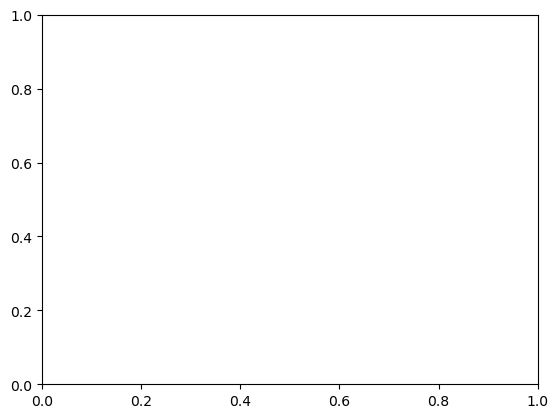

In [51]:
# Predict the values
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

# Plotting the results
print(len(X_train))
print(len(y_train))
print(X_test)
plt.scatter(X_train, y_train, color='green', label='Actual Data (Train)')
plt.scatter(X_test, y_pred, color='blue', label='Fitted Data (Test)')
plt.plot(X_test, y_pred, color='red', label='Fitted Line')
plt.xlabel('Your Feature Name Here')  # Ersetzen Sie 'Your Feature Name Here' durch die passende Beschriftung
plt.ylabel('ms_played')  # Beispiel: Label für die y-Achse
plt.title('Regression Model Performance')  # Beispiel: Passender Titel für das Diagramm
plt.legend()
plt.show()